# **Age Prediction Regression Project Using Speech Signal Analysis**

### **Student Information**
- **Name**: Mustafa Kerem Kose  
- **Student Number**: s339018  
- **University**: Politecnico di Torino 

### **Introduction**
This project focuses on developing a regression-based approach to estimate a speaker's age using features extracted from audio signals. By leveraging speech-related attributes and advanced machine learning techniques, it is aimed to create a robust and accurate predictive model.

In [1]:
import numpy as np
import pandas as pd

df_dev = pd.read_csv("development.csv", index_col=0)  #first column is used by the id    ----> (2933,19) shape

df_dev.nunique()        #initial considerations can be made
df_dev.isna().sum()     #it is checked if there are any NaN values

df_dev

,sampling_rate,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
Id,,,,,,,,,,,,,,,,,,,
0,22050,24.0,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav
1,22050,22.5,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav
2,22050,22.0,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav
3,22050,22.0,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav
4,22050,22.0,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,22050,24.0,male,english,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,[184.5703125],-100.921055,69,281,11,17.461406,audios_development/2929.wav
2929,22050,15.0,female,igbo,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,[83.35433468],6.757283,0,0,1,1.509206,audios_development/2930.wav
2930,22050,17.0,female,igbo,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,[89.10290948],-53.913449,1,9,1,1.645034,audios_development/2931.wav


In [2]:
df_dev.dtypes      #since there is no null values, further evaluation can be made by checking the types of each attribute. 
                   #It can be seen that, there are 4 object data types, it might be started by taking them into consideration ----> [gender,ethnicity,tempo,path]

df_dev['gender'].unique()   

# After careful investigation, tempo attribute is in fact a float type data rather than an object so it can be transformed to float by removing the brackets easily.
df_dev['tempo'] = df_dev['tempo'].str.strip("[]")
df_dev['tempo'] = df_dev['tempo'].astype('float')

df_eval = pd.read_csv("evaluation.csv", index_col=0)  #first column is used by the id    ----> (691,18) shape
df_eval.loc[df_eval['gender'] == 'famale','gender'] = 'female'  #there is only one 'famale' misspelled data. it is changed

df_eval['tempo'] = df_eval['tempo'].str.strip("[]")
df_eval['tempo'] = df_eval['tempo'].astype('float')



df_full = pd.get_dummies(pd.concat([df_dev, df_eval], axis=0), columns=['ethnicity','gender'])   #by doing one-hot encoding, extra 221 columns are added into our dataframe. The reason to concatinate both...
                                                                                                 #evaluation and development sets are that they needed to be fit with the same values.
df_dev = df_full.iloc[:len(df_dev)]
df_eval = df_full.iloc[len(df_dev):]
df_dev

,sampling_rate,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,...,ethnicity_xasonga,ethnicity_xiang,ethnicity_yakut,ethnicity_yapese,ethnicity_yiddish,ethnicity_yoruba,ethnicity_yupik,ethnicity_zulu,gender_female,gender_male
Id,,,,,,,,,,,,,,,,,,,,,
0,22050,24.0,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,...,False,False,False,False,False,False,False,False,True,False
1,22050,22.5,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,...,False,False,False,False,False,False,False,False,True,False
2,22050,22.0,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,...,False,False,False,False,False,False,False,False,True,False
3,22050,22.0,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,...,False,False,False,False,False,False,False,False,True,False
4,22050,22.0,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,22050,24.0,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,...,False,False,False,False,False,False,False,False,False,True
2929,22050,15.0,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,...,False,False,False,False,False,False,False,False,True,False
2930,22050,17.0,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,...,False,False,False,False,False,False,False,False,True,False


In [3]:
from sklearn.model_selection import train_test_split

#for now path column is simply dropped, it will be analyzed later

df_simple = df_dev.drop(columns=['path','sampling_rate'])    # The sampling rate was excluded as it is constant across all samples, providing no variability or useful information for the model.

#starting with the random forest regressor might be a good idea so, dataset needs to be seperated..

X = df_simple.drop(columns='age')          # all values excluding age column making them ready for test,split
y = df_simple["age"]                       # all age 'target' values

X_train, X_valid, y_train, y_valid =train_test_split(X,y,shuffle=True, random_state=97)


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(100, random_state=97)
model.fit(X_train,y_train)
predict = model.predict(X_valid)
print(f"RMSE for random forest {np.sqrt(mean_squared_error(y_valid, predict))}")

RMSE for random forest 10.355041883287202


The Random Forest model is evaluated as a baseline scenario to establish a reference point for performance.

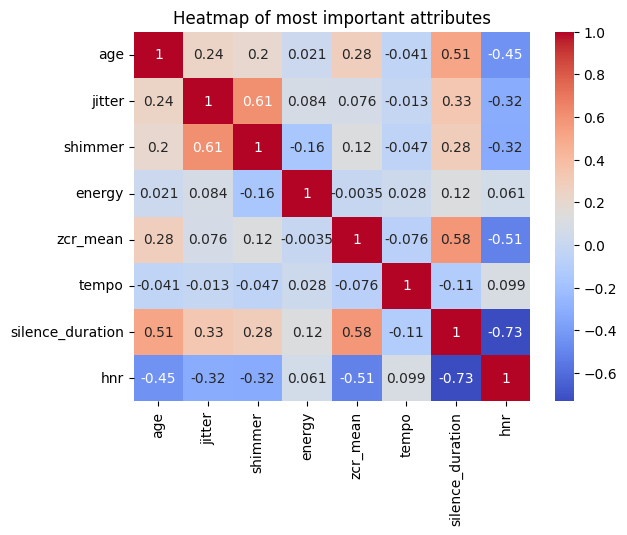

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_dev[['age','jitter', 'shimmer', 'energy','zcr_mean','tempo','silence_duration','hnr']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')     
plt.title('Heatmap of most important attributes')           
plt.show()

In [6]:
df_dev.describe()      

,sampling_rate,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration
count,2933.0,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,22050.0,27.897886,1189.536569,3779.570485,146.934930,0.021190,0.107741,0.005208,0.104774,2176.369847,125.085771,-74.526288,41.307535,167.936243,12.423116,13.501159
std,0.0,13.093316,414.193673,532.847869,3.757917,0.006626,0.029005,0.006074,0.051646,578.925294,33.812698,38.446856,32.782431,133.816974,14.273205,10.839142
min,22050.0,6.000000,346.974330,935.515560,145.349140,0.007292,0.045205,0.000028,0.015947,692.116731,51.679688,-193.693345,0.000000,0.000000,1.000000,0.668345
25%,22050.0,19.000000,818.922360,3948.234400,145.419140,0.016734,0.087378,0.001960,0.060733,1740.756716,103.359375,-104.555692,4.000000,14.000000,1.000000,1.732925
50%,22050.0,23.000000,1208.998300,3998.397200,145.622010,0.020525,0.104697,0.003716,0.098964,2150.814043,117.453835,-84.415550,69.000000,281.000000,8.000000,17.368526
75%,22050.0,32.000000,1523.777700,3999.485400,146.820890,0.024558,0.124993,0.006338,0.139559,2566.190670,143.554688,-40.339359,69.000000,281.000000,20.000000,21.408798
max,22050.0,97.000000,2724.892800,3999.792500,202.040700,0.096153,0.265167,0.129114,0.335976,4144.132595,287.109375,12.403661,69.000000,281.000000,97.000000,83.777596


The describe function provides useful statistical insights into the dataset, highlighting features that could be relevant for analysis. One observation is the potential presence of outliers in the maximum pitch values, which I will further investigate by visualizing the data.

In [7]:
import librosa
import numpy as np
from tqdm import tqdm
import os

# List of all audio files
audio_dev = os.listdir('audios_development')

features = []

for file_name in tqdm(audio_dev):
    if file_name.endswith(".wav"):
        
        file_path = os.path.join("audios_development", file_name)
        y, sr = librosa.load(file_path)

        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

        
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  #Computation of Mel Frequency Cepstral Coefficients (MFCC) with 13 most meaningful features and..
        rms = librosa.feature.rms(y=y)                       #Computation of RMS values

        #Extracted features
        spectrogram_std = np.std(log_spectrogram)    
        mfccs_mean = np.mean(mfccs)              
        rms_mean = np.mean(rms)

        features.append([rms_mean,spectrogram_std, mfccs_mean])


X_dev = np.array(features)
print("X_dev shape:", X_dev.shape)  


100%|██████████| 2933/2933 [01:38<00:00, 29.87it/s]

X_dev shape: (2933, 3)


In [8]:
df_dev['rms_mean'] = X_dev[:, 0]
df_dev['spectrogram_std'] = X_dev[:, 1]
df_dev['mfccs_mean'] = X_dev[:, 2]

/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/2844576686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev['rms_mean'] = X_dev[:, 0]
/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/2844576686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev['spectrogram_std'] = X_dev[:, 1]
/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/2844576686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

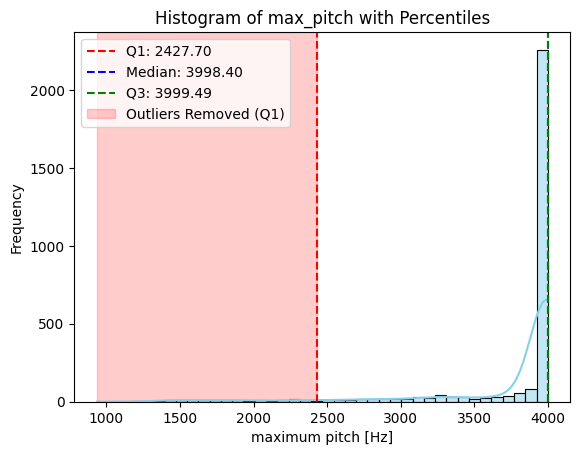

In [9]:
sns.histplot(df_dev['max_pitch'], kde=True, bins=40, color='skyblue')

Q1 = df_dev['max_pitch'].quantile(0.05)
median = df_dev['max_pitch'].median()
Q3 = df_dev['max_pitch'].quantile(0.75)

plt.axvline(Q1, color='red', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(median, color='blue', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(Q3, color='green', linestyle='--', label=f'Q3: {Q3:.2f}')
plt.axvspan(np.min(df_dev['max_pitch']), Q1, color='red', alpha=0.2, label='Outliers Removed (Q1)')

plt.title('Histogram of max_pitch with Percentiles')
plt.xlabel('maximum pitch [Hz]')
plt.ylabel('Frequency')
plt.legend()
plt.show()

df_dev = df_dev[df_dev['max_pitch'] > Q1]            #it can be seen that the most of the values below 


In [10]:
# Splitting step one more time 
df_simple = df_dev.drop(columns=['sampling_rate','path'])   

X = df_simple.drop(columns='age')          
y = df_simple["age"]                       

X_train, X_valid, y_train, y_valid =train_test_split(X,y,shuffle=True, random_state=97)

In [11]:
# now the model can be trained
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import xgboost as xgb


model = RandomForestRegressor(100, random_state=97)
model.fit(X_train,y_train)
predict = model.predict(X_valid)
print(f"RMSE for random forest {np.sqrt(mean_squared_error(y_valid, predict))}")

RMSE for random forest 10.236605761926539


In [12]:
# feature importances can be checked for relevance
sorted(zip(df_simple.drop(columns=['age']).columns, model.feature_importances_), key=lambda x: x[1],reverse=True)  

[('silence_duration', np.float64(0.3143119051372004)),
 ('jitter', np.float64(0.05543138030871498)),
 ('hnr', np.float64(0.05134805566654307)),
 ('spectral_centroid_mean', np.float64(0.0508319472668273)),
 ('num_pauses', np.float64(0.048721834430530964)),
 ('spectrogram_std', np.float64(0.04716281088636063)),
 ('mean_pitch', np.float64(0.039503554830370734)),
 ('energy', np.float64(0.03919094097556995)),
 ('max_pitch', np.float64(0.038579541684698494)),
 ('zcr_mean', np.float64(0.03792063983777622)),
 ('shimmer', np.float64(0.03767489065832726)),
 ('mfccs_mean', np.float64(0.03765056418089466)),
 ('min_pitch', np.float64(0.03626709473668897)),
 ('ethnicity_english', np.float64(0.03451992869984536)),
 ('rms_mean', np.float64(0.03331086794387627)),
 ('tempo', np.float64(0.03314491606385236)),
 ('gender_female', np.float64(0.0041192405554981056)),
 ('gender_male', np.float64(0.003491367348265146)),
 ('ethnicity_greek', np.float64(0.0032602275324243603)),
 ('ethnicity_polish', np.float64(0

/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/770047431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev.loc[:,'silence_jitter'] = df_dev['silence_duration']*df_dev['jitter']
/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/770047431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev.loc[:,'hnr_shimmer'] = df_dev['hnr']*df_dev['shimmer']
/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/770047431.py:16: SettingWithCopyWarning: 
A value is try

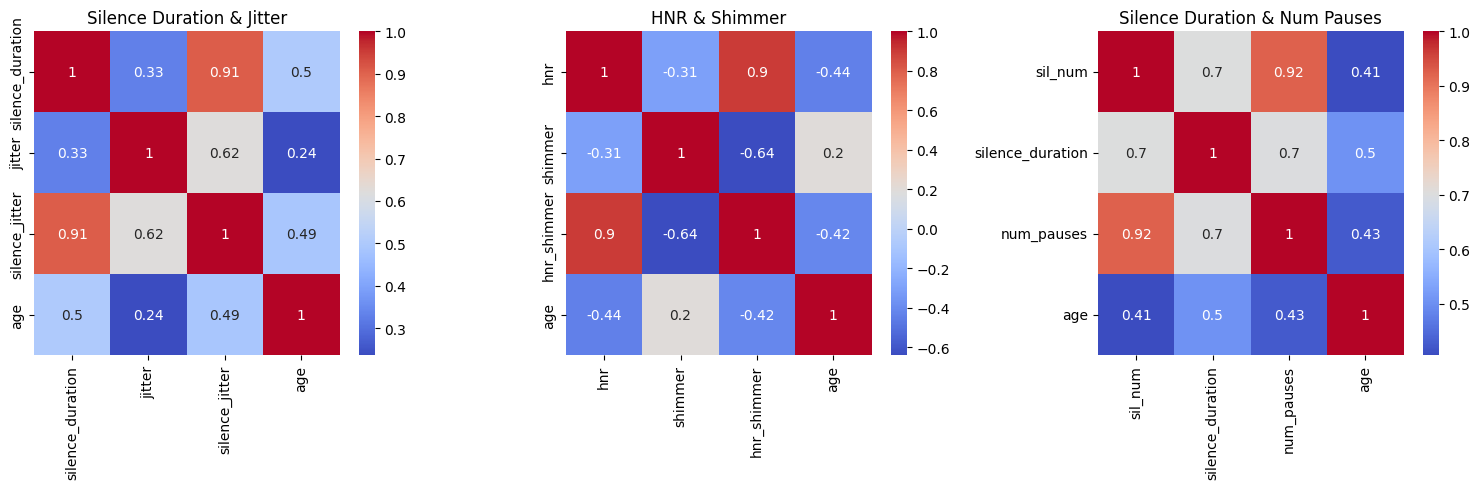

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# First heatmap: silence_jitter
df_dev.loc[:,'silence_jitter'] = df_dev['silence_duration']*df_dev['jitter']
correlation_matrix1 = df_dev[['silence_duration', 'jitter', 'silence_jitter', 'age']].corr()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Silence Duration & Jitter')

# Second heatmap: hnr_shimmer
df_dev.loc[:,'hnr_shimmer'] = df_dev['hnr']*df_dev['shimmer']
correlation_matrix2 = df_dev[['hnr', 'shimmer', 'hnr_shimmer', 'age']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('HNR & Shimmer')

# Third heatmap: sil_num
df_dev.loc[:,'sil_num'] = df_dev['silence_duration']*df_dev['num_pauses']
correlation_matrix3 = df_dev[['sil_num', 'silence_duration', 'num_pauses', 'age']].corr()
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Silence Duration & Num Pauses')

# # Adjust layout
plt.tight_layout()
plt.show()

In [47]:
df_dev['log_shimmer'] = np.log1p(df_dev['shimmer'])

df_simple = df_dev.drop(columns=['sampling_rate','num_words','jitter','path','num_words','hnr'])   

X = df_simple.drop(columns='age')          # all values excluding age column making them ready for test,split
y = df_simple["age"]                       # all age 'target' values

X_train, X_valid, y_train, y_valid =train_test_split(X,y,shuffle=True, random_state=97)

/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/1012064818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev['log_shimmer'] = np.log1p(df_dev['shimmer'])


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'random_state': [97],
    'subsample' :[0.8, 1.0]
}

gs = GridSearchCV(xgb.XGBRegressor(), param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1,cv=5)
gs.fit(X_train, y_train)
gs.best_params_


{'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 200,
 'random_state': 97,
 'subsample': 0.8}

In [49]:
best_model = xgb.XGBRegressor(**gs.best_params_)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

rmse = root_mean_squared_error(y_valid, y_pred)
print(f"RMSE: {rmse}")

RMSE: 9.915931338299577


In [60]:
param_grid2 = {
    'max_depth': [None, 5, 10, 20],
    'n_estimators': [100, 250,400],
    'criterion': ['poisson', 'squared_error'],
    'max_features': ['sqrt', 'log2']
}

gs2 = GridSearchCV(RandomForestRegressor(), param_grid2, scoring='neg_root_mean_squared_error', n_jobs=-1,cv=5)
gs2.fit(X_train, y_train)
gs2.best_params_


{'criterion': 'poisson',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 400}

In [63]:
model_rf = RandomForestRegressor(**gs2.best_params_)
model_rf.fit(X_train,y_train)
predict = model_rf.predict(X_valid)
print(f"RMSE for random forest {np.sqrt(mean_squared_error(y_valid, predict))}")

RMSE for random forest 10.072883296074737


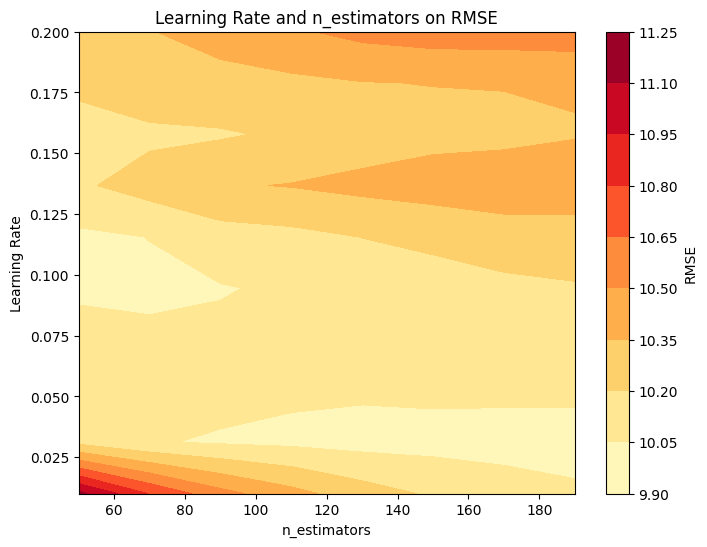

In [20]:
learning_rates = np.linspace(0.01, 0.2, 10)
n_estimators = np.arange(50, 201, 20)


rmse_grid = np.zeros((len(learning_rates), len(n_estimators)))

for i, lr in enumerate(learning_rates):
    for j, n in enumerate(n_estimators):
        model = xgb.XGBRegressor(learning_rate=lr, n_estimators=n, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        rmse_grid[i, j] = rmse

plt.figure(figsize=(8, 6))   #contour plot
X, Y = np.meshgrid(n_estimators, learning_rates)
contour = plt.contourf(X, Y, rmse_grid, levels=10, cmap="YlOrRd")
plt.colorbar(contour, label="RMSE")
plt.title("Learning Rate and n_estimators on RMSE")
plt.xlabel("n_estimators")
plt.ylabel("Learning Rate")
plt.show()

### Processing of Evaluation files

In [56]:
audio_eval = os.listdir('audios_evaluation')

features = []

for file_name in tqdm(audio_eval):
    if file_name.endswith(".wav"):

        file_path = os.path.join("audios_evaluation", file_name)
        y, sr = librosa.load(file_path)

        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
        log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

        rms = librosa.feature.rms(y=y)                       #Computation of RMS
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Computation of MFCCs

        spectrogram_std = np.std(log_spectrogram)    
        mfccs_mean = np.mean(mfccs)              
        rms_mean = np.mean(rms)

        features.append([rms_mean,spectrogram_std, mfccs_mean])


X_eval = np.array(features)

df_eval.loc[:,'rms_mean'] = X_eval[:, 0]
df_eval.loc[:,'spectrogram_std'] = X_eval[:, 1]
df_eval.loc[:,'mfccs_mean'] = X_eval[:, 2 ]

df_eval

100%|██████████| 691/691 [00:25<00:00, 27.08it/s]


,sampling_rate,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,...,ethnicity_zulu,gender_female,gender_male,rms_mean,spectrogram_std,mfccs_mean,log_shimmer,silence_jitter,hnr_shimmer,sil_num
Id,,,,,,,,,,,,,,,,,,,,,
0,22050,NaN,1056.91740,3945.1610,145.38750,0.022082,0.171076,0.003136,0.032963,1549.607050,...,False,False,True,0.034047,15.070207,-16.340885,0.157923,0.843489,-19.958176,76.397007
1,22050,NaN,1231.84570,3999.1720,145.56432,0.026571,0.132585,0.006783,0.123895,2344.817369,...,False,False,True,0.057834,15.106928,-14.583258,0.124503,0.786640,-10.375314,799.346939
2,22050,NaN,958.29065,3445.4490,145.67374,0.018044,0.096289,0.004478,0.089149,1939.574896,...,False,False,True,0.080389,17.538221,-16.183867,0.091931,0.041059,-6.897284,4.551111
3,22050,NaN,1396.54170,3998.8948,145.41223,0.027290,0.088901,0.014893,0.097054,1832.059113,...,False,True,False,0.034714,15.709586,-17.929756,0.085169,0.604525,-9.026411,686.706939
4,22050,NaN,1633.86770,3999.7632,145.36313,0.021621,0.103855,0.001369,0.140950,2534.611168,...,False,False,True,0.015294,11.577258,-13.725974,0.098809,0.484972,-14.011562,785.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,22050,NaN,570.62740,3900.6730,145.67577,0.018842,0.079197,0.004545,0.072083,1946.502158,...,False,False,True,0.039372,16.763332,-19.599024,0.076217,0.035082,-3.397175,1.861950
687,22050,NaN,974.13965,3919.0024,145.90408,0.024367,0.117492,0.000878,0.076900,3319.620800,...,False,False,True,0.059722,16.671118,-9.877738,0.111087,0.118820,-17.022318,4.876190
688,22050,NaN,1113.27650,3999.3510,145.38307,0.020637,0.089355,0.009148,0.095613,1973.127197,...,False,True,False,0.056729,16.485970,-21.019035,0.085586,0.527118,-6.572968,383.129252


In [57]:
df_eval.loc[:,'log_shimmer'] = np.log1p(df_eval.loc[:,'shimmer'])

df_eval['silence_jitter'] = df_eval['silence_duration']*df_eval['jitter']
df_eval['hnr_shimmer'] = df_eval['hnr']*df_eval['shimmer']
df_eval['sil_num'] = df_eval['silence_duration']*df_eval['num_pauses']

df_simple = df_eval.drop(columns=['age','num_words','sampling_rate','jitter','path','hnr'])

/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/2880905723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['silence_jitter'] = df_eval['silence_duration']*df_eval['jitter']
/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/2880905723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['hnr_shimmer'] = df_eval['hnr']*df_eval['shimmer']
/var/folders/fg/n2fjmfwx7sd7jn0b66szq4qm0000gn/T/ipykernel_1023/2880905723.py:5: SettingWithCopyWarning: 
A value is trying t

In [58]:
# df_simple needs to have the same columns as used in training
expected_features = best_model.feature_names_in_
df_simple_aligned = df_simple[expected_features]

df_simple_aligned

,mean_pitch,max_pitch,min_pitch,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,num_characters,num_pauses,...,ethnicity_zulu,gender_female,gender_male,rms_mean,spectrogram_std,mfccs_mean,silence_jitter,hnr_shimmer,sil_num,log_shimmer
Id,,,,,,,,,,,,,,,,,,,,,
0,1056.91740,3945.1610,145.38750,0.171076,0.003136,0.032963,1549.607050,80.749512,281,2,...,False,False,True,0.034047,15.070207,-16.340885,0.843489,-19.958176,76.397007,0.157923
1,1231.84570,3999.1720,145.56432,0.132585,0.006783,0.123895,2344.817369,89.102909,281,27,...,False,False,True,0.057834,15.106928,-14.583258,0.786640,-10.375314,799.346939,0.124503
2,958.29065,3445.4490,145.67374,0.096289,0.004478,0.089149,1939.574896,123.046875,22,2,...,False,False,True,0.080389,17.538221,-16.183867,0.041059,-6.897284,4.551111,0.091931
3,1396.54170,3998.8948,145.41223,0.088901,0.014893,0.097054,1832.059113,123.046875,281,31,...,False,True,False,0.034714,15.709586,-17.929756,0.604525,-9.026411,686.706939,0.085169
4,1633.86770,3999.7632,145.36313,0.103855,0.001369,0.140950,2534.611168,112.347147,281,35,...,False,False,True,0.015294,11.577258,-13.725974,0.484972,-14.011562,785.066667,0.098809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,570.62740,3900.6730,145.67577,0.079197,0.004545,0.072083,1946.502158,112.347147,15,1,...,False,False,True,0.039372,16.763332,-19.599024,0.035082,-3.397175,1.861950,0.076217
687,974.13965,3919.0024,145.90408,0.117492,0.000878,0.076900,3319.620800,112.347147,22,1,...,False,False,True,0.059722,16.671118,-9.877738,0.118820,-17.022318,4.876190,0.111087
688,1113.27650,3999.3510,145.38307,0.089355,0.009148,0.095613,1973.127197,112.347147,281,15,...,False,True,False,0.056729,16.485970,-21.019035,0.527118,-6.572968,383.129252,0.085586


In [59]:
y_pred = best_model.predict(df_simple_aligned)   #---> prediction

output_df = pd.DataFrame(y_pred, columns=["Predicted"])
output_df.to_csv("predicted.csv", index_label="Id")    # Saving to CSV file